In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from pathlib import Path
import pickle
from PIL import Image

In [29]:
import matplotlib.pyplot as plt

from fastai.vision import ImageDataBunch
from fastai.vision import LabelLists
from fastai.vision import get_transforms

In [30]:
xx = train_data['data'][0]

In [8]:
xx.shape

(3072,)

In [10]:
xx.reshape(3, 32, 32).transpose(1, 2, 0).shape

(32, 32, 3)

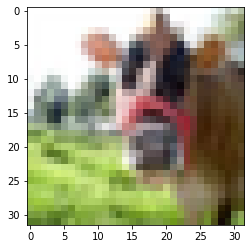

In [11]:
plt.imshow(xx.reshape(3, 32, 32).transpose(1, 2, 0))

In [31]:
path = Path('cifar100')
train_file = 'train'
test_file = 'test'

In [32]:
def unpickle(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

In [33]:
train_data = unpickle(path / train_file)
test_data = unpickle(path / test_file)

In [7]:
train_data['data']

array([[255, 255, 255, 255, ...,   4,  10,  59,  79],
       [255, 253, 253, 253, ..., 253, 253, 253, 255],
       [250, 248, 247, 248, ..., 190, 194, 207, 228],
       [124, 131, 135, 138, ..., 223, 232, 236, 231],
       ...,
       [167, 199, 193, 192, ...,  59,  83, 129,  99],
       [248, 240, 236, 234, ..., 185, 180, 174, 205],
       [156, 151, 151, 151, ..., 117, 114, 107, 126],
       [ 31,  30,  31,  32, ...,  75,  72,  69,  67]], dtype=uint8)

In [25]:
train_data.keys()

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])

In [26]:
train_data['fine_labels']

[19,
 29,
 0,
 11,
 1,
 86,
 90,
 28,
 23,
 31,
 39,
 96,
 82,
 17,
 71,
 39,
 8,
 97,
 80,
 71,
 74,
 59,
 70,
 87,
 59,
 84,
 64,
 52,
 42,
 64,
 8,
 17,
 47,
 65,
 21,
 22,
 81,
 11,
 24,
 84,
 78,
 45,
 49,
 97,
 56,
 76,
 11,
 90,
 89,
 78,
 73,
 14,
 87,
 9,
 71,
 6,
 47,
 20,
 98,
 47,
 36,
 55,
 72,
 43,
 51,
 35,
 83,
 33,
 27,
 53,
 92,
 50,
 15,
 89,
 36,
 18,
 89,
 46,
 33,
 42,
 39,
 64,
 75,
 38,
 23,
 42,
 66,
 77,
 49,
 18,
 46,
 15,
 35,
 69,
 95,
 83,
 75,
 99,
 73,
 93,
 55,
 39,
 4,
 97,
 61,
 93,
 51,
 69,
 56,
 84,
 59,
 64,
 94,
 4,
 11,
 33,
 68,
 38,
 20,
 33,
 34,
 32,
 46,
 53,
 88,
 67,
 70,
 64,
 53,
 64,
 8,
 96,
 87,
 30,
 20,
 30,
 66,
 19,
 76,
 87,
 52,
 62,
 35,
 63,
 40,
 4,
 99,
 63,
 74,
 53,
 26,
 95,
 48,
 27,
 33,
 29,
 39,
 79,
 32,
 46,
 64,
 28,
 85,
 32,
 82,
 78,
 39,
 54,
 28,
 66,
 65,
 72,
 21,
 64,
 62,
 72,
 0,
 44,
 7,
 12,
 19,
 11,
 31,
 61,
 79,
 45,
 81,
 79,
 98,
 43,
 46,
 67,
 80,
 68,
 74,
 48,
 81,
 94,
 86,
 69,
 39,
 73,
 2

In [15]:
xx = train_data['data'].reshape(-1, 3, 32, 32)

In [25]:
std = xx.std((0, 2, 3))/ 255

In [26]:
mean = xx.mean((0, 2, 3))/ 255

In [28]:
list(mean), list(std)

([0.5070751592371323, 0.48654887331495095, 0.4409178433670343],
 [0.26733428587924035, 0.2564384629170881, 0.2761504713256853])

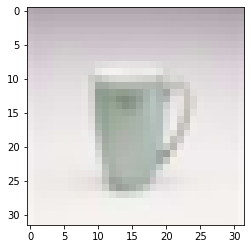

In [17]:
plt.imshow(xx[7].transpose(1, 2, 0))

In [18]:
def convert_to_folder_format(data, split):
    folder = path / split
    if not folder.exists():
        folder.mkdir() 
    for i, filename in enumerate(data['filenames']):
        print(i, end='\r')
        img = data['data'][i]
        class_folder = folder / str(data['fine_labels'][i])
        if not class_folder.exists():
            class_folder.mkdir()
        plt.imsave(class_folder / filename, img.reshape(3, 32, 32).transpose(1, 2, 0))      

In [19]:
convert_to_folder_format(train_data, split='train_data2')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
convert_to_folder_format(test_data, split='valid_data2')

In [6]:
data = ImageDataBunch.from_folder(path,
                                  train='train_data',
                                  valid='valid_data',
                                  ds_tfms=get_transforms(),
                                  num_workers=0
                                 )


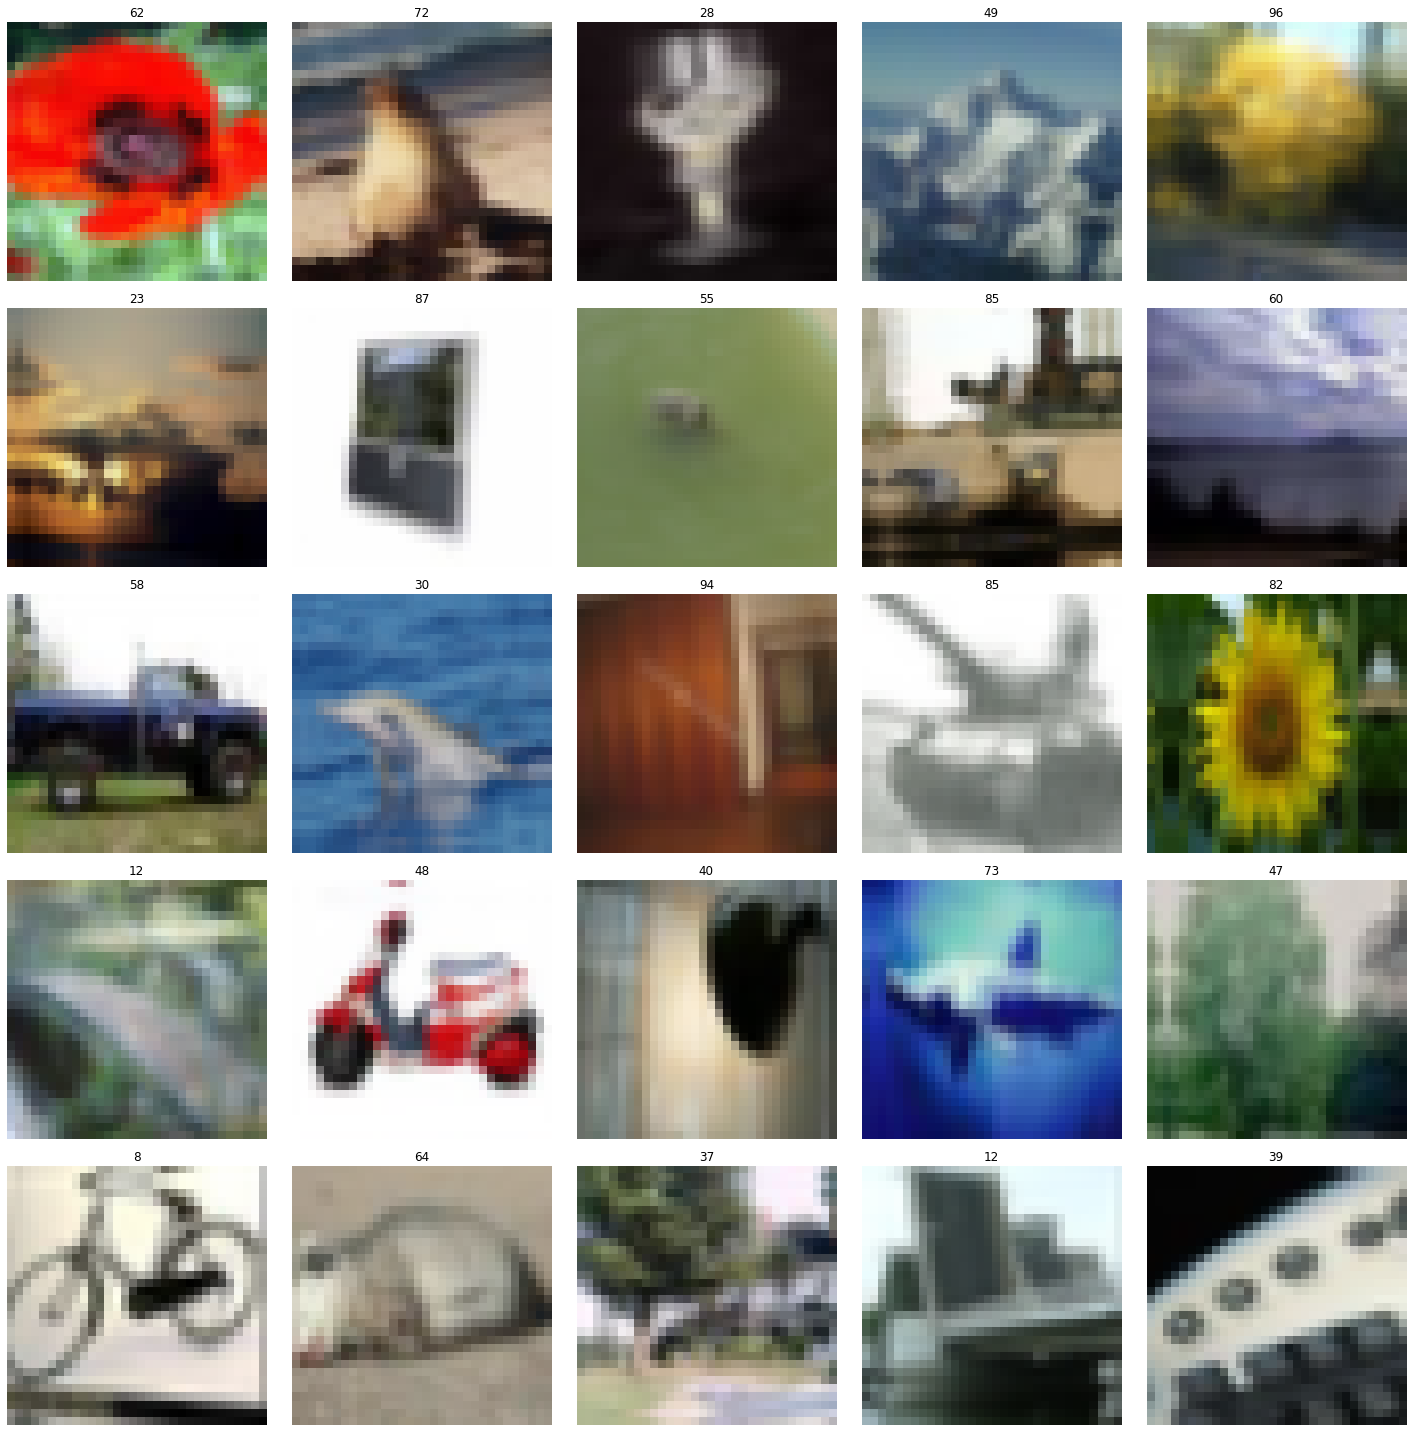

In [7]:
data.show_batch()

## Convert to 64 batch size

In [34]:
import numpy as np
from PIL import Image

In [35]:
def convert_to_folder_format(data, split, resize_to):
    folder = path / split
    if not folder.exists():
        folder.mkdir() 
    for i, filename in enumerate(data['filenames']):
        print(i, end='\r')
        img = data['data'][i]
        class_folder = folder / str(data['fine_labels'][i])
        if not class_folder.exists():
            class_folder.mkdir()
        img = np.array(Image.fromarray(img.reshape(3, 32, 32).transpose(1, 2, 0)).resize((size, size), Image.BICUBIC))
        plt.imsave(class_folder / filename, img)

In [36]:
size = 64
convert_to_folder_format(train_data, split=f'train_data{size}', resize_to=size)

In [37]:
convert_to_folder_format(test_data, split=f'valid_data{size}', resize_to=size)

In [10]:
plt.imresize


AttributeError: module 'matplotlib.pyplot' has no attribute 'imresize'